<h1 style="color:red;">Lab 4</h1>

*Date:7/6/2024*

<ol>
    <li>

1. Pandas A data manipulation library providing structures like DataFrame and Series for easy data cleaning, transformation, and aggregation.
2. Scikit-learn A comprehensive machine learning library offering tools for model selection, preprocessing, evaluation, and various algorithms.
3. Matplotlib A versatile plotting library for creating static, animated, and interactive visualizations.
4. Seaborn A statistical data visualization library built on Matplotlib, providing high-level interface for drawing attractive statistical graphics.
5. XGBoost An efficient and scalable gradient boosting library known for high performance in large-scale and high-dimensional data.
6. StandardScaler A Scikit-learn tool for standardizing features by removing the mean and scaling to unit variance.
7. DecisionTreeClassifier A Scikit-learn algorithm that uses tree-like models for classification, easy to interpret but can overfit.
8. RandomForestClassifier An ensemble method in Scikit-learn that constructs multiple decision trees to improve accuracy and reduce overfitting.
9. StackingClassifier A meta-classifier in Scikit-learn that combines multiple base classifiers to improve prediction accuracy.
10. LogisticRegression A linear model in Scikit-learn for binary classification, estimating probabilities using a logistic function.</li>
</ol>
<i>By Ammar Alrousan</i>


In [21]:
import pandas as pd
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import f1_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, StackingClassifier
from sklearn.linear_model import LogisticRegression
from xgboost import XGBClassifier
import matplotlib.pyplot as plt
import seaborn as sns
import warnings


<h1 style="color:black;">Suppress specific FutureWarning from seaborn</h1>


In [22]:
warnings.filterwarnings("ignore", category=FutureWarning, module='seaborn._oldcore')


<h1 style="color:black;">Paths to the datasets</h1>


In [23]:
TRAIN_PATH = "/kaggle/input/just-ai-249-machine-learning-lab-competition/spambase_train.csv"
TEST_PATH = "/kaggle/input/just-ai-249-machine-learning-lab-competition/spambase_test.csv"
SAMPLE_SUBMISSION_PATH = "/kaggle/input/just-ai-249-machine-learning-lab-competition/sample_submission.csv"


<h1 style="color:black;">Load and display data sets</h1>


In [24]:
train_df = pd.read_csv(TRAIN_PATH)
test_df = pd.read_csv(TEST_PATH)
sample_submission = pd.read_csv(SAMPLE_SUBMISSION_PATH)

print(train_df.head())
print(test_df.head())
print(sample_submission.head())

   word_freq_make  word_freq_address  word_freq_all  word_freq_3d  \
0            0.00                0.0           1.12           0.0   
1            0.32                0.0           0.64           0.0   
2            0.00                0.0           0.00           0.0   
3            0.19                0.0           0.00           0.0   
4            0.00                0.0           0.00           0.0   

   word_freq_our  word_freq_over  word_freq_remove  word_freq_internet  \
0           0.56            0.00               0.0                0.00   
1           0.32            0.32               0.0                1.61   
2           0.34            0.00               0.0                0.34   
3           0.00            0.00               0.0                0.00   
4           0.00            0.00               0.0                0.00   

   word_freq_order  word_freq_mail  ...  char_freq_(  char_freq_[  \
0             0.00            0.56  ...        0.101         0.00   
1 

<h1 style="color:black;">Displaying information about the datasets</h1>


In [25]:
print(train_df.info())
print(test_df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3220 entries, 0 to 3219
Data columns (total 59 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   word_freq_make              3220 non-null   float64
 1   word_freq_address           3220 non-null   float64
 2   word_freq_all               3220 non-null   float64
 3   word_freq_3d                3220 non-null   float64
 4   word_freq_our               3220 non-null   float64
 5   word_freq_over              3220 non-null   float64
 6   word_freq_remove            3220 non-null   float64
 7   word_freq_internet          3220 non-null   float64
 8   word_freq_order             3220 non-null   float64
 9   word_freq_mail              3220 non-null   float64
 10  word_freq_receive           3220 non-null   float64
 11  word_freq_will              3220 non-null   float64
 12  word_freq_people            3220 non-null   float64
 13  word_freq_report            3220 

<h1 style="color:black;">Statistical summary of the training data</h1>


In [26]:
print(train_df.describe())


       word_freq_make  word_freq_address  word_freq_all  word_freq_3d  \
count     3220.000000        3220.000000    3220.000000   3220.000000   
mean         0.107565           0.219578       0.275407      0.058829   
std          0.314254           1.327783       0.503584      1.259640   
min          0.000000           0.000000       0.000000      0.000000   
25%          0.000000           0.000000       0.000000      0.000000   
50%          0.000000           0.000000       0.000000      0.000000   
75%          0.000000           0.000000       0.410000      0.000000   
max          4.540000          14.280000       5.100000     42.810000   

       word_freq_our  word_freq_over  word_freq_remove  word_freq_internet  \
count    3220.000000     3220.000000       3220.000000         3220.000000   
mean        0.314683        0.097298          0.118898            0.099686   
std         0.651033        0.284463          0.409209            0.346193   
min         0.000000        0.

<h1 style="color:black;">Target variable distribution</h1>


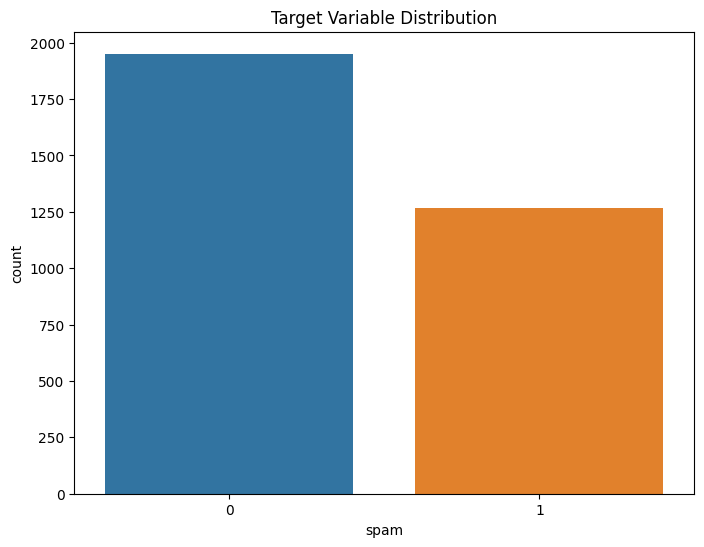

In [27]:
plt.figure(figsize=(8, 6))
sns.countplot(x='spam', data=train_df)
plt.title('Target Variable Distribution')
plt.show()

<h1 style="color:black;">Correlation matrix of features</h1>


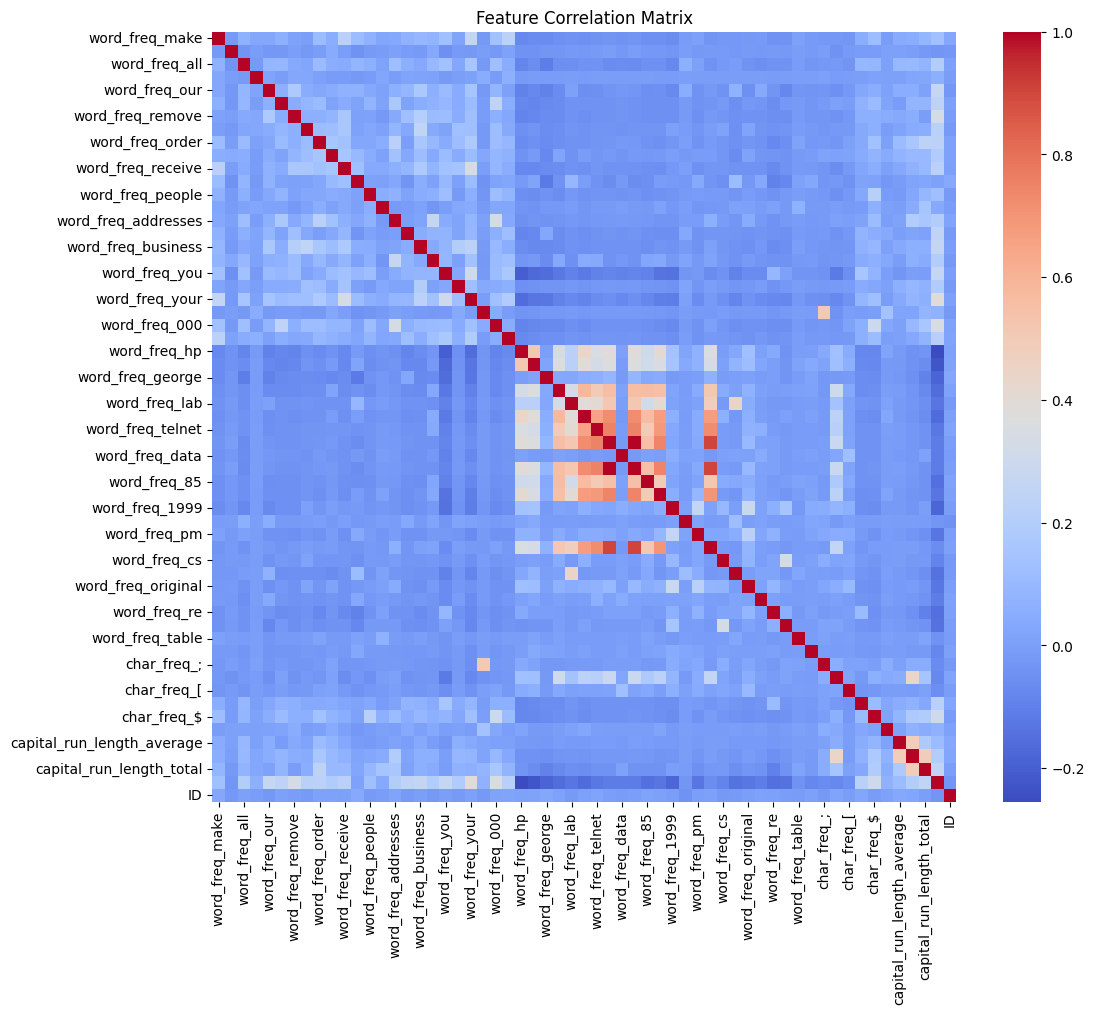

In [28]:
plt.figure(figsize=(12, 10))
sns.heatmap(train_df.corr(), annot=False, cmap='coolwarm')
plt.title('Feature Correlation Matrix')
plt.show()

<h1 style="color black;"> Features and target </h1>


In [29]:
X = train_df.drop(columns=['ID', 'spam'])
y = train_df['spam']

<h1 style="color black;"> Train-test split for validation</h1>

In [30]:
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)


<h1 style="color black;">Feature scaling </h1>

In [31]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_val_scaled = scaler.transform(X_val)
test_scaled = scaler.transform(test_df.drop(columns=['ID']))

<h1 style="color black;">Decision Tree</h1>

In [32]:
dt_model = DecisionTreeClassifier(random_state=42)
dt_model.fit(X_train_scaled, y_train)
y_val_pred_dt = dt_model.predict(X_val_scaled)
f1_dt = f1_score(y_val, y_val_pred_dt)
print(f"Decision Tree F1 Score: {f1_dt}")

Decision Tree F1 Score: 0.891170431211499


<h1 style="color black;">Random Forest</h1>

In [33]:
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train_scaled, y_train)
y_val_pred_rf = rf_model.predict(X_val_scaled)
f1_rf = f1_score(y_val, y_val_pred_rf)
print(f"Random Forest F1 Score: {f1_rf}")

Random Forest F1 Score: 0.9517819706498951


<h1 style="color black;">Cross-validation for Decision Tree</h1>

In [34]:
f1_scores_dt = cross_val_score(dt_model, X_train_scaled, y_train, cv=5, scoring='f1')
print(f"Decision Tree Cross-validated F1 Scores: {f1_scores_dt.mean()}")

Decision Tree Cross-validated F1 Scores: 0.8798520842239375


<h1 style="color black;">Cross-validation for Random Forest</h1>

In [35]:
f1_scores_rf = cross_val_score(rf_model, X_train_scaled, y_train, cv=5, scoring='f1')
print(f"Random Forest Cross-validated F1 Scores: {f1_scores_rf.mean()}")

Random Forest Cross-validated F1 Scores: 0.9291232508866161


<h1 style="color black;">Stacking</h1>

In [36]:
estimators = [
    ('rf', RandomForestClassifier(random_state=42)),
    ('xgb', XGBClassifier(random_state=42))
]

stacking_model = StackingClassifier(estimators=estimators, final_estimator=LogisticRegression())
stacking_model.fit(X_train_scaled, y_train)
y_val_pred_stack = stacking_model.predict(X_val_scaled)
f1_stack = f1_score(y_val, y_val_pred_stack)
print(f"Stacking F1 Score: {f1_stack}")

Stacking F1 Score: 0.9583333333333334


<h1 style="color black;">Final predictions</h1>

In [37]:
final_model = stacking_model
test_predictions = final_model.predict(test_scaled)

# Creating the submission file
submission = sample_submission.copy()
submission['spam'] = test_predictions
submission.to_csv('submission.csv', index=False)
print(submission.head())

     ID  spam
0  1981     0
1  1940     0
2  4260     1
3  3200     1
4  3082     1


<h1 style="color black;">Summary of model performance</h1>

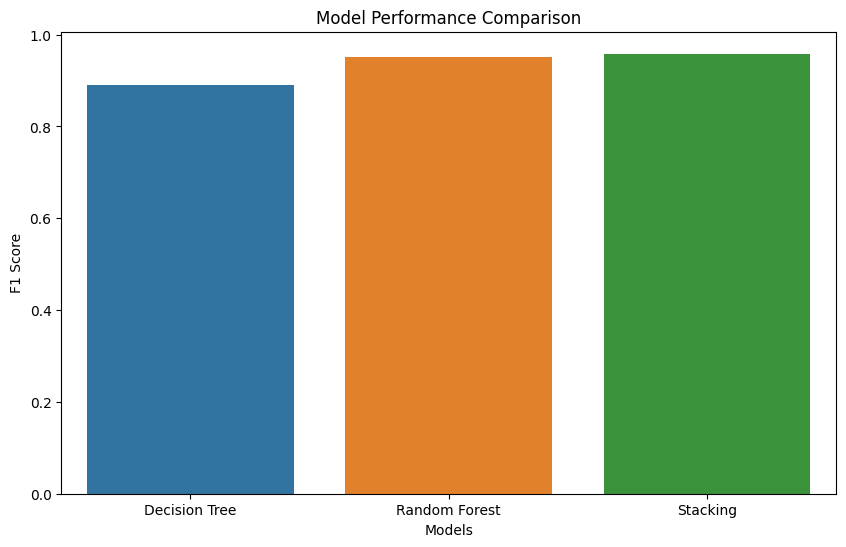

In [38]:
models = ['Decision Tree', 'Random Forest', 'Stacking']
scores = [f1_dt, f1_rf, f1_stack]

plt.figure(figsize=(10, 6))
sns.barplot(x=models, y=scores)
plt.title('Model Performance Comparison')
plt.xlabel('Models')
plt.ylabel('F1 Score')
plt.show()